In [1]:
#import necesary libraries
import pandas as pd
import io
import numpy as np
import seaborn as sns
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")
import matplotlib.pyplot as plt


#
data1 = pd.read_csv(r"\\192.168.0.7\3tdata\data_lake\shell_pad11\fsf_raw_full.csv",low_memory=False)
data2 = pd.read_csv(r"\\192.168.0.7\3tdata\data_lake\shell_pad11\sep_raw_full.csv",low_memory=False)


print("Data Loaded OK")

Data Loaded OK


In [2]:
dsA = data1.copy()
dsB = data2.copy()

print(dsA.columns)
print(dsB.columns)

Index(['Time', 'Pressure[Bar]', 'DP[Bar]', 'Temperature[C]', 'Velocity[m/s]',
       'Quality', 'WaterCut[%]', 'Xl', 'WWC[%]', 'ch1[nA]', 'ch2[nA]',
       'ch3[nA]', 'ch4[nA]', 'ch5[nA]', 'TotWLR[%]', 'XLM', 'GasDen[kg/m3]',
       'GasVisc[cP]', 'Kappa', 'LiqDen[kg/m3]', 'LiqVisc[cP]', 'TotWLR[%].1',
       'Qg[m3/d]', 'Ql[m3/d]', 'Qo[m3/d]', 'Qw[m3/d]', 'QgStd[m3/d]',
       'QlStd[m3/d]', 'QoStd[m3/d]', 'QwStd[m3/d]', 'filename', 'Frg_dp_out'],
      dtype='object')
Index(['DATE & TIME', 'Well Feeding', 'Sep. Static Pressurepsig',
       'Sep. diff. Press"H2O', 'Sep. Gas Tempdeg C', 'Orif. Diam.in.',
       'Gas Rate m3/d', 'Gas Cumm.m3', 'GOR (Gas/Oil Ratio) Testm3/m3',
       'Oil Tempdeg C', 'Oil Flow m3/d', 'Oil Cumm.m3', 'Water Flow Ratem3/d',
       'Water  Cumm.m3', 'Flow Water Cut %'],
      dtype='object')


In [3]:
dsA['Time'] = pd.to_datetime(dsA['Time'])
dsA['Time_hs'] = dsA['Time'].dt.strftime('%Y-%m-%d %H:%M:%S')
dsA = dsA.sort_values('Time')
dsB['Time'] = pd.to_datetime(dsB['DATE & TIME'])
dsB['Time_hs'] = dsB['Time'].dt.strftime('%Y-%m-%d %H:%M:%S')
dsB = dsB.sort_values('Time_hs')

print(dsA['Time_hs'].head())
print(dsB['Time_hs'].head())

67    2021-03-20 10:00:00
0     2021-03-31 23:00:00
1     2021-04-01 00:00:00
2     2021-04-01 01:00:00
3     2021-04-01 02:00:00
Name: Time_hs, dtype: object
0    2020-01-06 06:00:00
1    2020-01-06 07:00:00
2    2020-01-06 08:00:00
3    2020-01-06 09:00:00
4    2020-01-06 10:00:00
Name: Time_hs, dtype: object


In [4]:
ds = pd.merge(dsA, dsB, on='Time_hs')
ds.sort_values(by='Time_hs')
ds.drop_duplicates(subset ='Time_hs',keep='first',inplace=True) 

ds['Time_hs'].head(25)

0     2021-03-20 10:00:00
1     2021-03-31 23:00:00
2     2021-04-01 00:00:00
3     2021-04-01 01:00:00
4     2021-04-01 02:00:00
5     2021-04-01 03:00:00
6     2021-04-01 04:00:00
7     2021-04-01 05:00:00
8     2021-04-01 06:00:00
9     2021-04-01 07:00:00
10    2021-04-01 08:00:00
11    2021-04-01 09:00:00
12    2021-04-01 10:00:00
13    2021-04-01 11:00:00
14    2021-04-01 12:00:00
15    2021-04-01 13:00:00
16    2021-04-01 14:00:00
17    2021-04-01 15:00:00
18    2021-04-01 16:00:00
19    2021-04-01 17:00:00
20    2021-04-01 18:00:00
21    2021-04-01 19:00:00
22    2021-04-01 20:00:00
23    2021-04-01 21:00:00
24    2021-04-01 22:00:00
Name: Time_hs, dtype: object

In [5]:
mask = (ds['Time_hs'] > '2021-03-1 06:00:00') & (ds['Time_hs'] <= '2021-08-12 18:00:00')

ds1 = ds.loc[mask]


ds1.to_csv(r"\\192.168.0.7\3tdata\data_lake\shell_pad11\compared_data_full.csv", index=False, encoding='utf-8-sig')

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

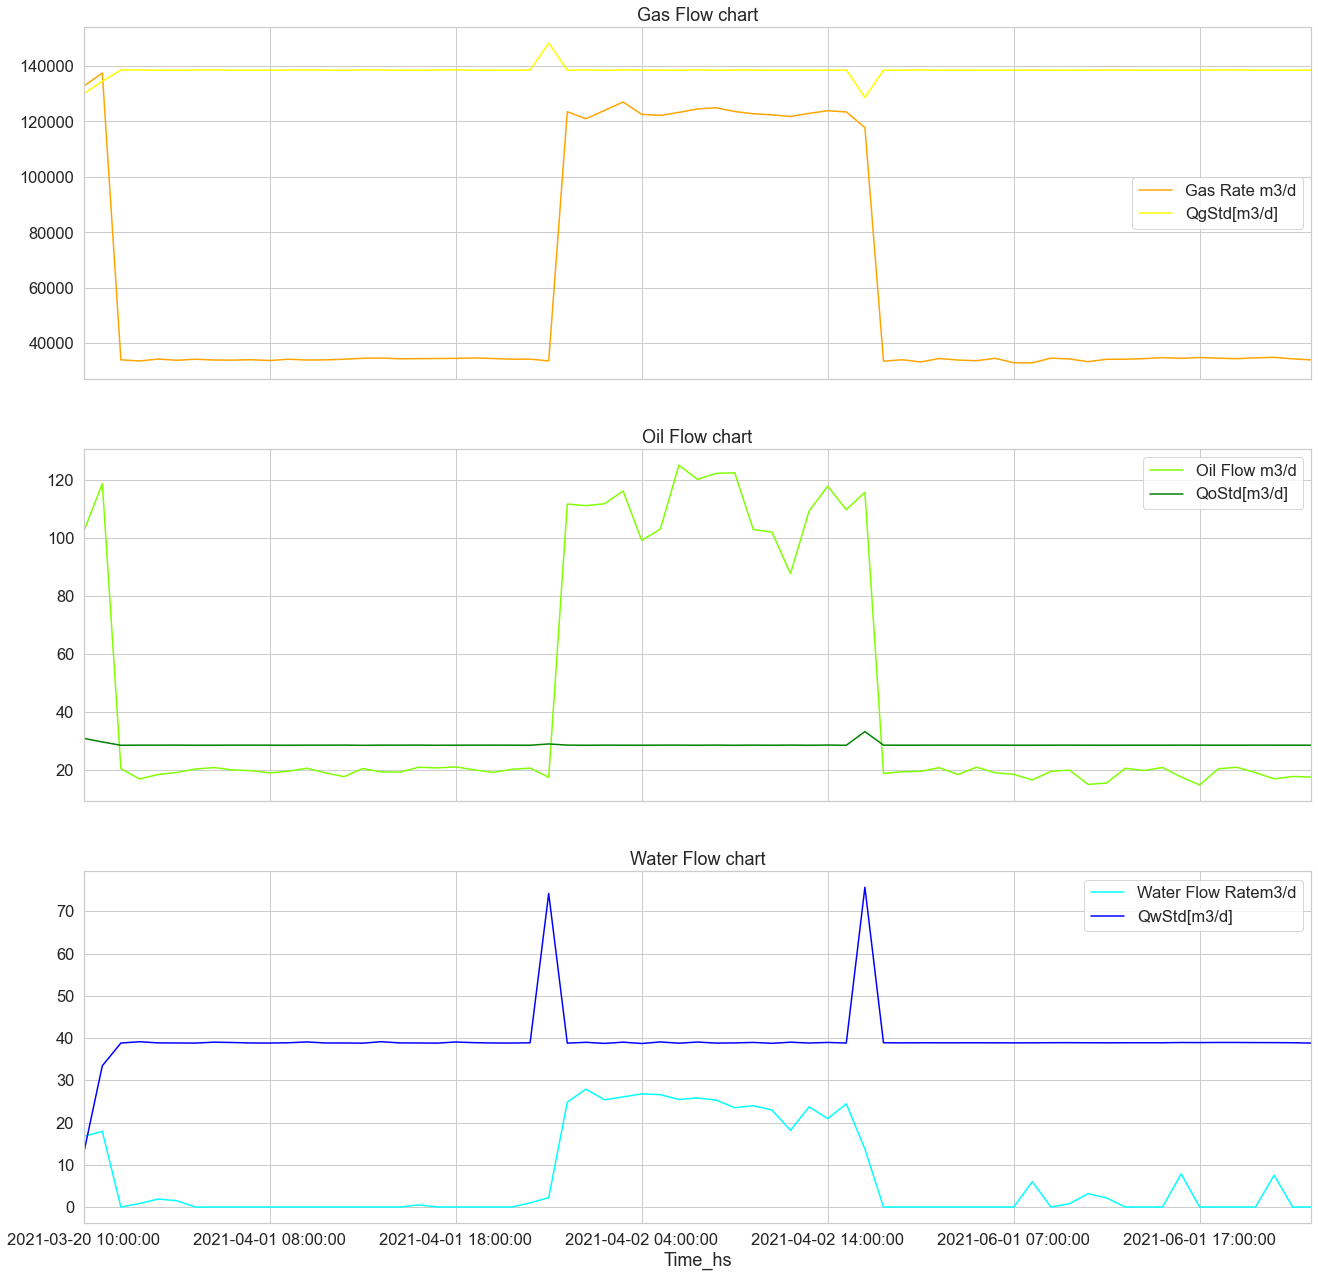

In [6]:
mask = (ds['Time_hs'] > '2021-03-1 06:00:00') & (ds['Time_hs'] <= '2021-08-12 18:00:00')

ds1 = ds.loc[mask]

fig, ax = plt.subplots(3,figsize=(22,22),sharex=True)
ds1.plot(x='Time_hs', y=['Gas Rate m3/d','QgStd[m3/d]'],color=['orange','yellow','red'],ax=ax[0])
ds1.plot(x='Time_hs', y=['Oil Flow m3/d','QoStd[m3/d]'],color=['chartreuse','green','red'],ax=ax[1])
ds1.plot(x='Time_hs', y=['Water Flow Ratem3/d','QwStd[m3/d]'],color=['aqua','blue','red'],ax=ax[2])
ax[0].set(title="Gas Flow chart")
ax[1].set(title="Oil Flow chart")
ax[2].set(title="Water Flow chart")
plt.show()